# Выпускной проект
Анализ отточности клиентов банка "Метанпром"

**Цель исследования:**
Анализ поведения клиентов регионального банка и выделение сегментов клиентов, которые склонны уходить из банка.
Составление рекомендаций для отдела маркетинга по конкретным сегментам.

**Описание данных:**
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
* USERID — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — количество баллов собственности
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — активный клиент,
* EST_SALARY — оценочный доход клиента,
* сhurn — признак оттока.

**План работы:**

По каждому шагу работы должны быть сформулированы промежуточные выводы.

**Шаг 1. Открыть файл с данными и изучить общую информацию:**
* Импортируйте  нужные библиотеки. 
* Считайте данные из csv-файла в датафрейм и сохраните в переменную, выведите первые 20 строчек.
* Выведите основную информацию о датафрейме с помощью метода info(). 

**Шаг 2. Предобработка данных:**
* Проверка на корректность наименований колонок
* Рассмотрите типы данных в каждом столбце:
 - Найдите столбцы, в которых нужно изменить тип данных.
 - Преобразуйте тип данных в выбранных столбцах.
* Найдите и изучите пропущенные значения в столбцах:
 - Определите, в каких столбцах есть пропуски.
 - Определить какой именно тип пропусков  встречается: MCAR, MAR, MNAR
 - Понять как эти пропуски зависят от имеющихся данных
 - Заполните пропущенные значения там, где это возможно. 
* Проверка на аномальные значения
* Проверка на явные дубликаты
* Изучите уникальные значения в столбцах city и user_id, проверьте на наличие неявных дубликатов.
* Кодирование переменных 

**Шаг 3. Исследовательский анализ данных:**
* Изучите распределения характеристик в разрезе оттока. Для непрерывных характеристик постройте гистограммы или kde-графики, для категориальных — столбчатые диаграммы с уровнями оттока, либо тепловую карту с долями пользующихся N продуктами в каждой из категорий.
* Проанализируйте все данные на предмет наличия корреляций с оттоком, опишите всё, что превосходит по модулю 10%, указывая размер корреляции
* По результатам подготовьте тепловую карту
* Определите факторы, которые больше всего влияют на отточность
* Составьте портреты типичных клиентов, которые склонны и не склонны уходить из банка

**Шаг 4. Проверка гипотез:**

* Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались, используя t-критерий и u-критерий.
* Сформулируйте и проверьте статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследовании

**Шаг 5 Сегментация пользователей и их приоритизация:**
* Объединяя признаки отточности, сформируйте сегменты, отберите из них лучшие

**Шаг 6. Напишите общий вывод и рекомендации по сегментам**

### Материалы:
Презентация: <https://disk.yandex.ru/i/YMYaPhlBysun6w>

## шаг. Открыть файл с данными и изучить общую информацию:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
display(data.head())
data.info()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Промежуточный вывод:** Мы импортировали необходимые для дальнейшей работы библиотеки, познакомились с данными.

## шаг. Предобработка данных

Для начала откорректируем названия столбцов.

In [3]:
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})

Столбцы переименованы. Теперь рассмотрим типы данных в каждом столбце. В столбце age указан тип данных float64, в то время как должен быть int64. Но данный столбец будет закодирован, поэтому менять смысла нет.

В столбцах credit_card, last_activity и churn по сути булево значение. Также менять пока не будем.

Приступим к обработке пропущенных значений в столбцах. Для начала определим в каких столбцах есть пропуски и посмотрим их долю.

In [4]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.300000
equity,0.000000
balance,23.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000


Пропуски имеются только в столбце balance, однако их достаточно много (23%), мы их не можем удалить, так как потеряем почти четверть данных. Заменить средним или медианой также не можем, так как это может повлиять на результаты  анализа. Нужно определить какой именно тип пропусков встречается: MCAR, MAR, MNAR. Для этого мы можем сравнить распределение других переменных между группами с пропусками и без пропусков. Для этого добавим столбец, где пропущенные значения в столбце с балансом будут обозначаться 1, а  остальные 0.

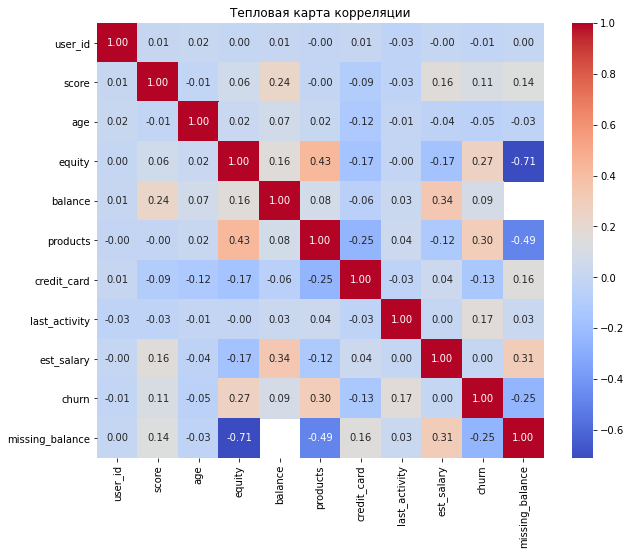

In [5]:
data['missing_balance'] = data['balance'].isnull().astype(int)

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

Самая высокая корреляция с missing_balance:
* -0.71 с equity
* -0.49 с products
* 0.31 с est_salary

чем выше значение переменных "equity" и "products", тем меньше вероятность наличия пропусков в столбце "balance". возможно пользователи с более высоким уровнем активов или использующие больше банковских продуктов могут быть более склонны к поддержанию полных данных в своих банковских записях.

Положительная корреляция 0.31 с переменной "est_salary" указывает на обратную связь: чем выше заработная плата клиента, тем больше вероятность наличия пропущенных значений в столбце "balance". 

In [6]:
# Разделение данных на две группы: с пропусками в столбце "balance" и без пропусков
missing_balance_group = data[data['balance'].isnull()]
non_missing_balance_group = data[data['balance'].notnull()]

# Вычисление средних и медианных значений для каждой группы по параметрам "equity", "products" и "est_salary"
missing_balance_stats = missing_balance_group[['equity', 'products', 'est_salary']].agg(['mean', 'median'])
non_missing_balance_stats = non_missing_balance_group[['equity', 'products', 'est_salary']].agg(['mean', 'median'])

# Переименование столбцов
missing_balance_stats.columns = [f'Missing Balance {stat}' for stat in missing_balance_stats.columns]
non_missing_balance_stats.columns = [f'Non-Missing Balance {stat}' for stat in non_missing_balance_stats.columns]

display(missing_balance_stats)
non_missing_balance_stats

,Missing Balance equity,Missing Balance products,Missing Balance est_salary
mean,0.05098,1.162092,226310.208654
median,0.00000,1.000000,174160.680000


,Non-Missing Balance equity,Non-Missing Balance products,Non-Missing Balance est_salary
mean,3.395068,2.080986,124501.872366
median,4.000000,2.000000,106222.200000


Оценки баллов собственности у пользователей с пропущенным балансом равны нулю, количество используемых продуктов меньше в два раза, но зарплата намного выше.

Проверка на аномальные значения:

In [7]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000,0.229500
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864,0.420532
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000


Странно, что у некоторых пользователей в products стоит значение 0. Это всего одна строка, удалим её.

In [8]:
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,1


In [9]:
data = data[data['products']!=0]

Проведём проверку на явные дубликаты

In [10]:
data.duplicated().sum()

0

Полных дубликатов не обнаружено. Изучим уникальные значения в столбцах city и user_id, проверим на наличие неявных дубликатов.

In [11]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [12]:
data['user_id'].duplicated().sum()

73

In [13]:
data['user_id'].value_counts().sort_values(ascending=False)

227795    2
191520    2
221809    2
187459    2
216848    2
         ..
176098    1
148085    1
163728    1
190219    1
215039    1
Name: user_id, Length: 9926, dtype: int64

In [14]:
data[data.duplicated(subset=['user_id'], keep=False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1,0
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1,0
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1,0
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0,0


Так не очень понятно в чём причина дубликатов, давайте посмотрим на конкретные пары. Чаще всего информация отличается незначительно и одна из записей менее полная.

In [15]:
duples = [227795, 191520, 221809, 187459, 216848]
data[data['user_id'].isin(duples)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance
3859,191520,773.0,Рыбинск,М,36.0,3,1219918.08,4,1,1,119933.13,1,0
4401,216848,929.0,Рыбинск,М,68.0,0,NaN,1,1,1,195902.59,0,1
4720,187459,895.0,Ярославль,М,48.0,0,NaN,1,1,0,180887.50,0,1
7931,191520,767.0,Ярославль,М,45.0,0,NaN,1,1,1,880005.05,0,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1,0
8293,216848,930.0,Ярославль,М,NaN,0,NaN,1,1,1,199542.51,0,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0,0
9322,221809,917.0,Рыбинск,М,45.0,0,NaN,1,1,1,199728.29,0,1
9380,187459,894.0,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0,1
9634,221809,917.0,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0,1


Так как это разные пользователи под одним номером, не стала удалять дубликаты. Но рекомендуется проверить систему по присваиванию айдишников.

Произведём кодирование переменных (пол и город), используя one-hot encoding 

In [16]:
processed_data = data.copy()
processed_data = pd.get_dummies(processed_data, columns=['city'])
processed_data = pd.get_dummies(processed_data, columns=['gender'], drop_first=True)
processed_data = processed_data.rename (
    columns = ({
        'city_Ростов':'Ростов', 'city_Рыбинск':'Рыбинск','city_Ярославль':'Ярославль', 'gender_М':'male'}))
processed_data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance,Ростов,Рыбинск,Ярославль,male
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,1,0,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,0,0,1,1


**Промежуточный вывод:** В рамках предобработки данных мы переименовали столбцы, проанализировали типы данных, проанализировали пропуски, избавились от аномального значения, удалили дубликаты по столбцу user_id, а также произвели кодирование переменных по городу и полу.

## шаг. Исследовательский анализ данных

Изучим распределения характеристик в разрезе оттока. Для непрерывных характеристик построим гистограммы или kde-графики, для категориальных — столбчатые диаграммы с уровнями оттока, либо тепловую карту с долями пользующихся N продуктами в каждой из категорий. 

Начнём с анализа распределения непрерывных характеристик: баланс, зарплата, баллы кредитного скоринга, возраст

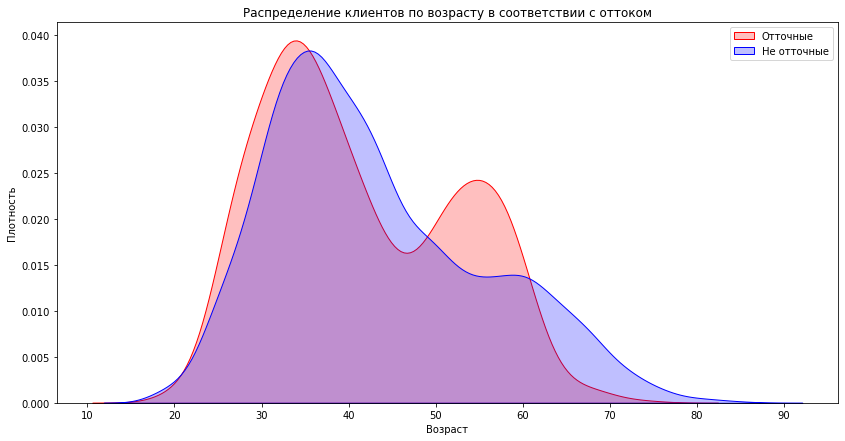

In [17]:
# Разделяем данные на две группы по оттоку
churned_clients = processed_data[processed_data['churn'] == 1]
not_churned_clients = processed_data[processed_data['churn'] == 0]

# Построение графика распределения для возраста
plt.figure(figsize=(14, 7))
sns.kdeplot(data=churned_clients['age'], color='red', label='Отточные', shade=True)
sns.kdeplot(data=not_churned_clients['age'], color='blue', label='Не отточные', shade=True)
plt.title('Распределение клиентов по возрасту в соответствии с оттоком')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()

plt.show()

отточные клиенты немного преобладают в интервале от 23 до 35 лет и значительно преобладают в интервале от 50 до 62 лет.

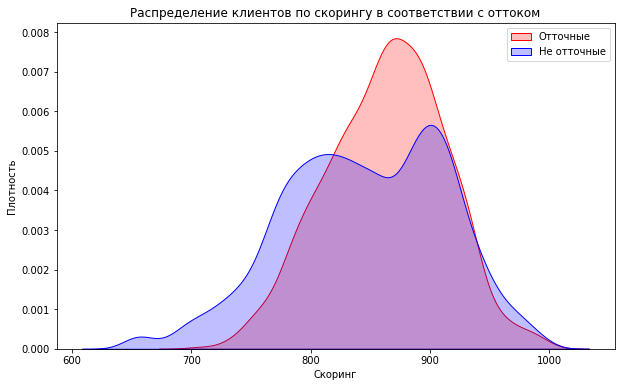

In [18]:
# Построение графика распределения для скоринга
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churned_clients['score'], color='red', label='Отточные', shade=True)
sns.kdeplot(data=not_churned_clients['score'], color='blue', label='Не отточные', shade=True)
plt.title('Распределение клиентов по скорингу в соответствии с оттоком')
plt.xlabel('Скоринг')
plt.ylabel('Плотность')
plt.legend()

plt.show()

отточные клиенты преобладают в интервале от 810 до 910 баллов скоринга

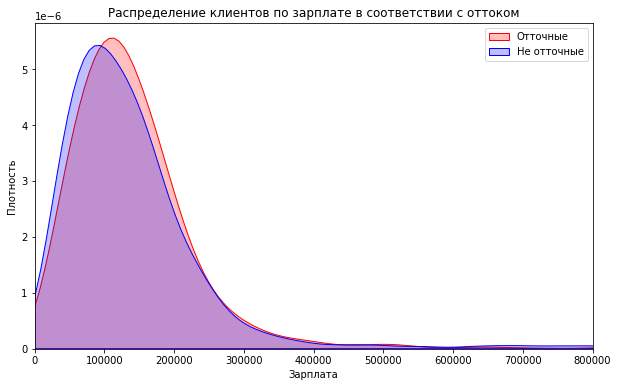

count    1.819000e+03
mean     1.483107e+05
std      1.229143e+05
min      1.088027e+04
25%      8.319661e+04
50%      1.253952e+05
75%      1.759854e+05
max      1.263028e+06
Name: est_salary, dtype: float64

In [19]:
# Построение графика распределения для зарплаты
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churned_clients['est_salary'], color='red', label='Отточные', shade=True)
sns.kdeplot(data=not_churned_clients['est_salary'], color='blue', label='Не отточные', shade=True)
plt.title('Распределение клиентов по зарплате в соответствии с оттоком')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.gca().set_xlim(left=0, right=800000)
plt.legend()

plt.show()

churned_clients['est_salary'].describe()

на данном графике отточные клиенты преобладают в интервале размера зарплаты от 100 000 до 250 000

In [20]:
not_churned_clients['est_salary'].describe()

count    8.180000e+03
mean     1.477832e+05
std      1.428024e+05
min      2.546300e+03
25%      7.350615e+04
50%      1.182577e+05
75%      1.739901e+05
max      1.395064e+06
Name: est_salary, dtype: float64

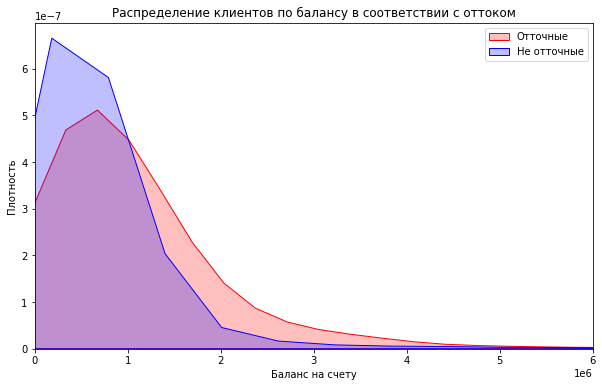

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churned_clients['balance'], color='red', label='Отточные', shade=True)
sns.kdeplot(data=not_churned_clients['balance'], color='blue', label='Не отточные', shade=True)
plt.title('Распределение клиентов по балансу в соответствии с оттоком')
plt.xlabel('Баланс на счету')
plt.ylabel('Плотность')
plt.gca().set_xlim(left=0, right=6000000)
plt.legend()

plt.show()

Когда значение баланса превышает 1.1 млн, то количество отточных клиентов становится больше, чем неотточных.

Выводы по графикам, отточных клиентов больше, чем неотточных в следующих интервалах:
* в интервале от 23 до 35 лет (незначительно) и в интервале от 50 до 62 лет (значительно).
* от 810 до 910 баллов скоринга
* при размере зарплаты от 100 000 до 250 000
* при балансе на счету от 1.1 млн

Итого по данным графикам у нас наиболее отточные клиенты в возрасте от 50 до 62, с высокими оценками скоринга, с более высокой зарплатой и большим балансом на счету.

Теперь построим графики для категориальных переменных

In [22]:
print("Средний отток по всему датасету:", round(data['churn'].mean(),2))

Средний отток по всему датасету: 0.18


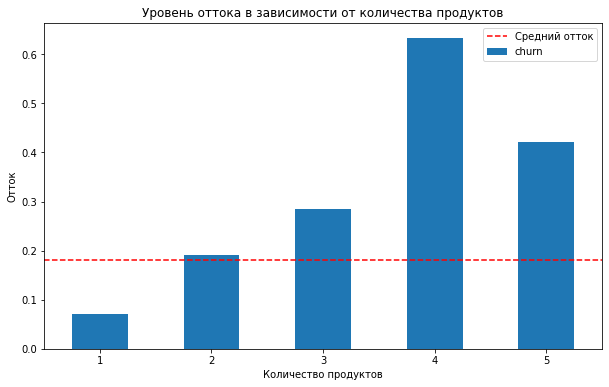

In [23]:
pivot_table = pd.pivot_table(processed_data, index='products', values='churn', aggfunc='mean')

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Уровень оттока в зависимости от количества продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Отток')
plt.xticks(rotation=0)

mean_churn = data['churn'].mean()
plt.axhline(y=mean_churn, color='r', linestyle='--', label='Средний отток')
plt.legend()

plt.show()

Количество продуктов: максимальный отток наблюдается у клиентов, которые используют 4 продукта, затем 5 и 3. У них значения выше среднего показателя оттока. То есть, чем больше продуктов использует пользователь, тем выше у него отточность.

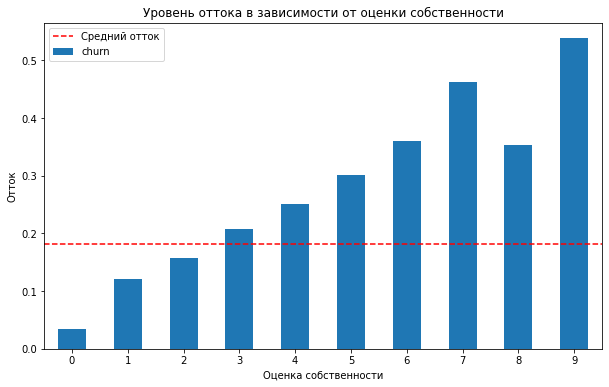

In [24]:
pivot_table = pd.pivot_table(processed_data, index='equity', values='churn', aggfunc='mean')

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Уровень оттока в зависимости от оценки собственности')
plt.xlabel('Оценка собственности')
plt.ylabel('Отток')
plt.xticks(rotation=0)

mean_churn = data['churn'].mean()
plt.axhline(y=mean_churn, color='r', linestyle='--', label='Средний отток')
plt.legend()

plt.show()

Оценка собственности: максимальное  значения оттока у пользователей с оценкой собственности = 9, затем 7, 6, 8, 5, 4, 3. То есть, чем больше у пользователя недвижимости, тем выше отточность. Так как для пользователей с оценкой недвижимости 0, 1 и 2 отточность ниже среднего.

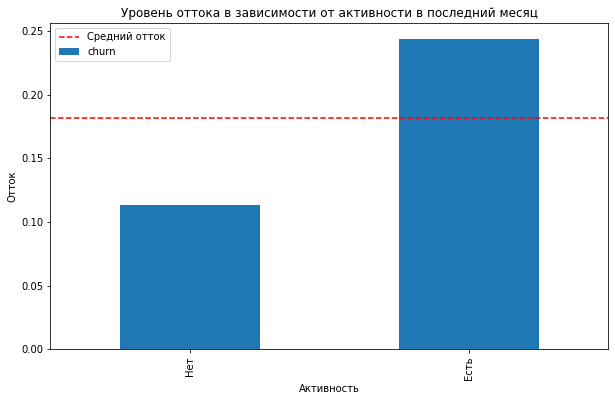

In [25]:
pivot_table = pd.pivot_table(processed_data, index='last_activity', values='churn', aggfunc='mean')

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Уровень оттока в зависимости от активности в последний месяц')
plt.xlabel('Активность')
plt.ylabel('Отток')
plt.xticks (ticks=[False, True], labels=['Нет', 'Есть'])

mean_churn = data['churn'].mean()
plt.axhline(y=mean_churn, color='r', linestyle='--', label='Средний отток')
plt.legend()

plt.show()

Активность: пользователи, которые были активны в последний  месяц склонны покидать банк значительно чаще (примерно в два раза)

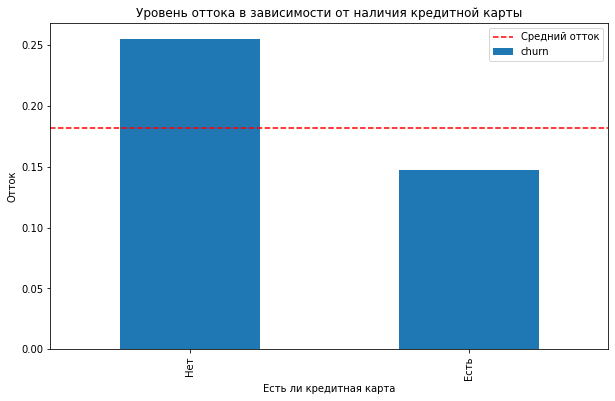

In [26]:
pivot_table = pd.pivot_table(processed_data, index='credit_card', values='churn', aggfunc='mean')

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Уровень оттока в зависимости от наличия кредитной карты')
plt.xlabel('Есть ли кредитная карта')
plt.ylabel('Отток')
plt.xticks (ticks=[False, True], labels=['Нет', 'Есть'])

mean_churn = data['churn'].mean()
plt.axhline(y=mean_churn, color='r', linestyle='--', label='Средний отток')
plt.legend()

plt.show()

Кредитная карта: пользователи без кредитной карты склонны покидать банк намного чаще.

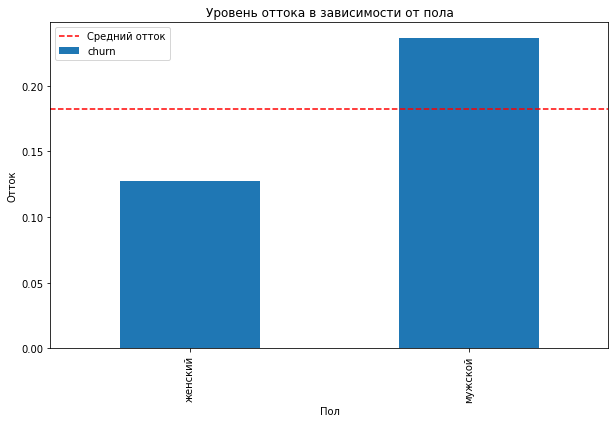

In [27]:
pivot_table = pd.pivot_table(processed_data, index='male', values='churn', aggfunc='mean')

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Уровень оттока в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Отток')
plt.xticks (ticks=[False, True], labels=['женский', 'мужской'])

mean_churn = data['churn'].mean()
plt.axhline(y=mean_churn, color='r', linestyle='--', label='Средний отток')
plt.legend()

plt.show()

Пол: мужчины покидают банк намного чаще

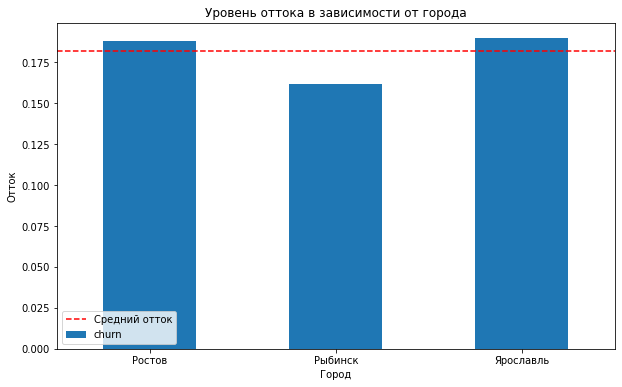

In [28]:
pivot_table = pd.pivot_table(data, index='city', values='churn', aggfunc='mean')

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Уровень оттока в зависимости от города')
plt.xlabel('Город')
plt.ylabel('Отток')
plt.xticks(rotation=0)

mean_churn = data['churn'].mean()
plt.axhline(y=mean_churn, color='r', linestyle='--', label='Средний отток')
plt.legend()

plt.show()

Результаты анализа категориальных переменных:
- Количество продуктов: максимальный отток наблюдается у клиентов, которые используют 4 продукта, затем 5 и 3. У них значения выше среднего показателя оттока. То есть, чем больше продуктов использует пользователь, тем выше у него отточность.
- Оценка собственности: максимальное  значения оттока у пользователей с оценкой собственности = 9, затем 7, 6, 8, 5, 4, 3. То есть, чем больше у пользователя недвижимости, тем выше отточность. Так как для пользователей с оценкой недвижимости 0, 1 и 2 отточность ниже среднего.
- Активность: пользователи, которые были активны в последний  месяц склонны покидать банк значительно чаще (примерно в два раза) 
- Кредитная карта: пользователи без кредитной карты склонны покидать банк намного чаще.
- Пол: мужчины покидают банк намного чаще
- Город: чуть выше среднего отток в Ярославле и Ростове.

In [29]:
processed_data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance,Ростов,Рыбинск,Ярославль,male
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,1,0,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,0,0,1,1


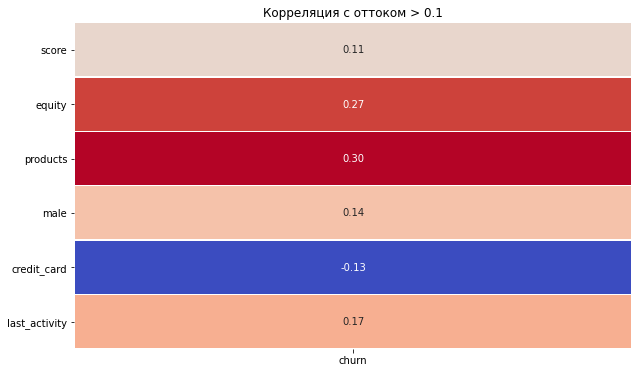

In [30]:
numeric_variables = ['score', 'age', 'equity', 'balance', 'products', 'est_salary', 'churn', 'Ростов', 
                     'Рыбинск', 'Ярославль', 'male', 'credit_card', 'last_activity']
correlation_matrix = processed_data[numeric_variables].corr()
churn_correlation = correlation_matrix['churn'].drop('churn') 
significant_correlations = churn_correlation[abs(churn_correlation) > 0.1]  # Выбираем только значимые корреляции

plt.figure(figsize=(10, 6))
sns.heatmap(significant_correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Корреляция с оттоком > 0.1')
plt.show()

In [31]:
significant_correlations = correlation_matrix[(correlation_matrix.abs() > 0.1) & (correlation_matrix != 1)]
significant_correlations = significant_correlations.abs().stack().sort_values(ascending=False)

for index, value in significant_correlations.items():
    if abs(value) > 0.1:
        print(f"Корреляция между '{index[0]}' и '{index[1]}': {correlation_matrix.loc[index[0], index[1]]:.2f}")


Корреляция между 'Ярославль' и 'Рыбинск': -0.73
Корреляция между 'Рыбинск' и 'Ярославль': -0.73
Корреляция между 'Ярославль' и 'Ростов': -0.49
Корреляция между 'Ростов' и 'Ярославль': -0.49
Корреляция между 'equity' и 'products': 0.43
Корреляция между 'products' и 'equity': 0.43
Корреляция между 'balance' и 'est_salary': 0.34
Корреляция между 'est_salary' и 'balance': 0.34
Корреляция между 'churn' и 'products': 0.30
Корреляция между 'products' и 'churn': 0.30
Корреляция между 'churn' и 'equity': 0.27
Корреляция между 'equity' и 'churn': 0.27
Корреляция между 'products' и 'credit_card': -0.25
Корреляция между 'credit_card' и 'products': -0.25
Корреляция между 'Рыбинск' и 'Ростов': -0.25
Корреляция между 'Ростов' и 'Рыбинск': -0.25
Корреляция между 'score' и 'balance': 0.24
Корреляция между 'balance' и 'score': 0.24
Корреляция между 'male' и 'age': -0.21
Корреляция между 'age' и 'male': -0.21
Корреляция между 'equity' и 'est_salary': -0.17
Корреляция между 'est_salary' и 'equity': -0.17


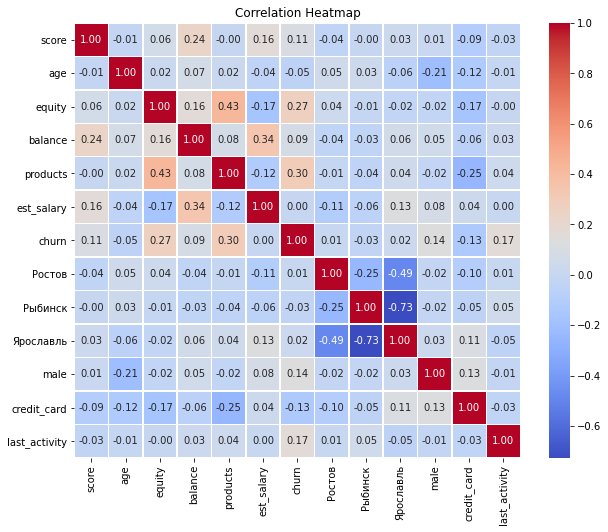

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Итого обнаружены три корреляции >10% с churn:
- products 0.30
- equity 0.27
- last_activity 0.17
- male 0.14
- credit_card  -0.13
- score 0.11

Таккже наблюдается корреляция между следующими параметрами:
- корреляция между 'products' и 'equity': 0.43
- корреляция между 'balance' и 'est_salary': 0.34
- корреляция между 'balance' и 'score': 0.24

Сравнение портретов типичных клиентов.  Типичные клиенты это типичные отточные  (churn  = 1) и типичные неотточные (churn = 0). Это группировка по показателю оттока. Для бинарных будем использовать медианы, для остальных средние
Для баланса и зарплаты считаем и среднее, и медиану из-за выбросов.

In [33]:
# Создание словаря для агрегации
agg_dict = {
    'score': 'mean',
    'age': 'mean',
    'equity': 'mean',
    'balance': ['mean', 'median'],
    'products': 'mean',
    'est_salary': ['mean', 'median'],
    'male': 'median',
    'Ростов': 'median',
    'Рыбинск': 'median',
    'Ярославль': 'median',
    'credit_card': 'median',
    'last_activity': 'median'
}

processed_data.groupby('churn').agg(agg_dict).reset_index().T


0             1
churn                      0.000000  1.000000e+00
score         mean       845.428362  8.633469e+02
age           mean        43.020846  4.142959e+01
equity        mean         2.374817  3.764156e+00
balance       mean    733982.585648  1.133993e+06
              median  475382.445000  7.824105e+05
products      mean         1.757579  2.377130e+00
est_salary    mean    147783.200108  1.483107e+05
              median  118257.715000  1.253952e+05
male          median       0.000000  1.000000e+00
Ростов        median       0.000000  0.000000e+00
Рыбинск       median       0.000000  0.000000e+00
Ярославль     median       1.000000  1.000000e+00
credit_card   median       1.000000  1.000000e+00
last_activity median       0.000000  1.000000e+00

In [34]:
#для бинарных переменных решила посмотреть процент единиц
summary_statistics = processed_data.groupby('churn').agg({
    'male': lambda x: x.mean(),
    'Ростов': lambda x: x.mean(),
    'Рыбинск': lambda x: x.mean(),
    'Ярославль': lambda x: x.mean(),
    'credit_card': lambda x: x.mean(),
    'last_activity': lambda x: x.mean()
}).reset_index()

summary_statistics.rename(columns={'female': 'female_percentage', 'male': 'male_percentage',
                                   'Ростов': 'Rostov_percentage', 'Рыбинск': 'Rybinsk_percentage',
                                   'Ярославль': 'Yaroslavl_percentage'}, inplace=True)

summary_statistics.T

,0,1
churn,0.000000,1.000000
male_percentage,0.467237,0.650357
Rostov_percentage,0.140709,0.146234
Rybinsk_percentage,0.276039,0.239692
Yaroslavl_percentage,0.583252,0.614074
credit_card,0.709169,0.551402
last_activity,0.483741,0.702584


**Промежуточный вывод:**

* По возрасту есть пик отточных клиентов от 25 до 40, но здесь же есть пик и у неотточных. Однако специфический пик для ушедших клиентов есть от 50 до 60 лет.
* Для скоринга есть небольшой пик отточных клиентов от 675 до 840 и более выраженный пик для 875 и 925.
* Медиана по зарплата у отточных клиентов чуть ниже, но вообще они расположены рядом. У отточных медиана = 118 000, а у неотточных 125 000.
* Когда баланс превышает 1 100 000, то отточных клиентов становится больше, чем неотточных.
* Количество продуктов: максимальный отток наблюдается у клиентов, которые используют 4 продукта, затем 5 и 3. У них значения выше среднего показателя оттока. То есть, чем больше продуктов использует пользователь, тем выше у него отточность.
* Оценка собственности: максимальное  значения оттока у пользователей с оценкой собственности = 9, затем 7, 6, 8, 5, 4, 3. То есть, чем больше у пользователя недвижимости, тем выше отточность. Так как для пользователей с оценкой недвижимости 0, 1 и 2 отточность ниже среднего.

Обнаружены три значительные корреляции с churn:

- products 0.30
- equity 0.27
- score 0.11

**Типичный неотточный клиент:** более вероятно, что это женщина, её скоринг в среднем 845, а возраст 43, среднее количество используемых продуктов 1,7, а средняя оценка собственности 2.3, она скорее всего из ярославля, медиана по зарплате 118 000, у неё почти наверняка есть кредитка, в последний месяц она чуть более вероятно, что не была активна.

**Типичный отточный клиент:** скорее всего это мужчина из Ярославля, ему 41 год, средний скоринг 863, а оценка собственности 3.8. В среднем такой клиент использует 2,4 продукта, а его зарплата около 125 000. Вероятность наличия кредитки ниже,чем у неотточного клиента, но активнсть в последний месяц выше.


## шаг. Проверка гипотез

Во всех гипотезах будет использоваться уровень значимости 0.01.

Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались, используя t-критерий и u-критерий.

Нулевая гипотеза: средние значения дохода между теми клиентами, которые ушли (churn=1) и теми, которые остались (churn=0), равны
Альтернативная гипотеза: средние значения дохода между теми клиентами, которые ушли (churn=1) и теми, которые остались (churn=0), не равны

In [35]:
salary_churned = processed_data[processed_data['churn'] == 1]['est_salary']
salary_not_churned = processed_data[processed_data['churn'] == 0]['est_salary']

# Проведение тестов
t_statistic, t_p_value = ttest_ind(salary_churned, salary_not_churned)
u_statistic, u_p_value = mannwhitneyu(salary_churned, salary_not_churned)

# Анализ результатов
print("t-статистика:", t_statistic)
print("t-значение:", t_p_value)
print("U-статистика:", u_statistic)
print("U-значение:", u_p_value)

t-статистика: 0.1459846578083951
t-значение: 0.8839364433181659
U-статистика: 7852245.0
U-значение: 0.00021160652203623057


Проведенный t-test показал, что нулевую гипотезу об отсутствии различий в доходах отточных и оставшихся клиентов опровергнуть не удалось. Но U-значение очень низкое, это говорит о том, что есть статистически значимые различия между распределениями дохода ушедших и оставшихся клиентов. Нулевая гипотеза о равенстве распределений отвергается в пользу альтернативной гипотезы.

Так как мы анализируем зарплаты, то я предпочитаю тест Манна-Уитни, так как он менее чувствительный к выбросам, которые наблюдаются по этому полю.

**Гипотеза 2. различие в количестве используемых банковских продуктов.**

Нулевая гипотеза: среднее количество используемых банковских продуктов между теми клиентами, которые ушли (churn=1) и теми, которые остались (churn=0), равны.

Альтернативная гипотеза: среднее количество используемых банковских продуктов между теми клиентами, которые ушли (churn=1) и теми, которые остались (churn=0), не равны.

Буду проводить t-test, так как эта переменная принимает значения от 1 до 5 и здесь нет выбросов.

In [36]:
products_churned = processed_data[processed_data['churn'] == 1]['products']
products_not_churned = processed_data[processed_data['churn'] == 0]['products']

t_statistic, t_p_value = ttest_ind(products_churned, products_not_churned)

print("t-статистика:", t_statistic)
print("t-значение:", t_p_value)

t-статистика: 31.630126751850124
t-значение: 2.3430165753532827e-209


Мы  отвергаем нулевую гипотезу в пользу альтернативной, так как p-значение (2.3068834568881753e-208) значительно ниже уровня значимости.

**Гипотеза 3. различие в баллах оценки собственности.**

Нулевая гипотеза: средние оценки собственности тех клиентов, которые ушли (churn=1) и тех, которые остались (churn=0), равны.

Альтернативная гипотеза: средние оценки собственности тех клиентов, которые ушли (churn=1) и тех, которые остались (churn=0), не равны.

Буду проводить t-test, так как эта переменная принимает значения от 0 до 9 и здесь нет выбросов.

In [37]:
equity_churned = processed_data[processed_data['churn'] == 1]['equity']
equity_not_churned = processed_data[processed_data['churn'] == 0]['equity']

t_statistic, t_p_value = ttest_ind(equity_churned, equity_not_churned)

print("t-статистика:", t_statistic)
print("t-значение:", t_p_value)

t-статистика: 28.102322724336787
t-значение: 2.6060183523439987e-167


Мы также отвергаем нулевую гипотезу в пользу альтернативной, так как p-значение (8.784114370183455e-166) значительно ниже уровня значимости.

**Гипотеза 4. различие средних значениях скоринга.**

Нулевая гипотеза: средние значения скоринга тех клиентов, которые ушли (churn=1) и тех, которые остались (churn=0), равны.

Альтернативная гипотеза: средние значения скоринга тех клиентов, которые ушли (churn=1) и тех, которые остались (churn=0), не равны.

Разброс не сильный, но я предпочту тест Манна-Уитни.

In [38]:
data['score'].describe()

count    9999.000000
mean      848.688069
std        65.441981
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

In [39]:
score_churned = processed_data[processed_data['churn'] == 1]['score']
score_not_churned = processed_data[processed_data['churn'] == 0]['score']

u_statistic, u_p_value = mannwhitneyu(score_churned, score_not_churned)

print("U-статистика:", u_statistic)
print("U-значение:", u_p_value)

U-статистика: 8509630.0
U-значение: 7.364570509844462e-22


При таком низком значении u-значения (7.364570509844462e-22), которое намного меньше выбранного уровня значимости 0.01, мы также отвергаем нулевую гипотезу в пользу альтернативной.

**Промежуточный вывод:** Нами были обнаружены различия средних значений дохода, оценки собственности, количества используемых продуктов и скоринга между теми клиентами, которые ушли и теми, которые остались. Это подтверждает наши выводы из исследовательского анализа.

## шаг. Сегментация пользователей и их приоритизация

Мы будем объединять по 2-3 признака и так, чтобы доля оттока сегмента была выше среднего по банку значения в два раза. Размер сегмента должен быть от 300 до 2000 человек.

In [40]:
processed_data['churn'].mean()

0.18191819181918192

In [41]:
segment_1 = processed_data[(processed_data['score'] >= 865) & (processed_data['equity'] >= 3.8)& (processed_data['products'] >= 3)]
churn_rate_segment_1 = round(segment_1['churn'].mean(), 2)
print ('Число отточных пользователей в 1 сегменте:', segment_1.shape[0])
print("Доля оттока в сегменте пользователей со скорингом выше 865 и баллами собственности >3.8, количеством продуктов >3:", churn_rate_segment_1)

Число отточных пользователей в 1 сегменте: 468
Доля оттока в сегменте пользователей со скорингом выше 865 и баллами собственности >3.8, количеством продуктов >3: 0.59


In [42]:
segment_2 = processed_data[(processed_data['credit_card'] == 0) & (processed_data['last_activity'] == 1) & (processed_data['male'] == 1)]
churn_rate_segment_2 = round(segment_2['churn'].mean(), 2)
print ('Число отточных пользователей в 2 сегменте:', segment_2.shape[0])
print("Доля оттока в сегменте активных в последний месяц пользователей мужчин без кредитной карты:", churn_rate_segment_2)

Число отточных пользователей в 2 сегменте: 720
Доля оттока в сегменте активных в последний месяц пользователей мужчин без кредитной карты: 0.42


In [43]:
segment_3 = processed_data[(processed_data['score'] >= 865) & (processed_data['equity'] >= 3.8)]
churn_rate_segment_3 = round(segment_3['churn'].mean(), 2)
print ('Число отточных пользователей в 3 сегменте:', segment_3.shape[0])
print("Доля оттока в сегменте пользователей со скорингом выше 865 и баллами собственности выше 3.8:", churn_rate_segment_3)

Число отточных пользователей в 3 сегменте: 1895
Доля оттока в сегменте пользователей со скорингом выше 865 и баллами собственности выше 3.8: 0.39


In [44]:
segment_4 = processed_data[(processed_data['est_salary'] >= 120000) & (processed_data['products'] >= 3)]
churn_rate_segment_4 = round(segment_4['churn'].mean(), 2)
print ('Число отточных пользователей в 4 сегменте:', segment_4.shape[0])
print("Доля оттока в сегменте пользователей с зарплатой выше 120к, использующих более 3 продуктов:", churn_rate_segment_4)

Число отточных пользователей в 4 сегменте: 683
Доля оттока в сегменте пользователей с зарплатой выше 120к, использующих более 3 продуктов: 0.51


In [45]:
segment_5 = processed_data[(processed_data['balance'] >= 1100000) & (processed_data['male'] == 1)]
churn_rate_segment_5 = round(segment_5['churn'].mean(), 2)
print ('Число отточных пользователей в 5 сегменте:', segment_5.shape[0])
print("Доля оттока в сегменте пользователей-мужчин с балансом выше 1.1млн:", churn_rate_segment_5)

Число отточных пользователей в 5 сегменте: 864
Доля оттока в сегменте пользователей-мужчин с балансом выше 1.1млн: 0.51


**Промежуточный вывод:**

Самые отточные сегменты:
* Доля оттока в 1 сегменте пользователей со скорингом выше 865 и баллами собственности выше 3.8 и количеством продуктов выше 3: 0.59 (466 человек)
* Доля оттока в 4 сегменте пользователей с зарплатой выше 120к, использующих более 3 продуктов: 0.52 (680 человек)
* Доля оттока в 5 сегменте пользователей-мужчин с балансом выше 1.1млн: 0.51 (862 человека)
* Доля оттока в 2 сегменте активных в последний месяц пользователей мужчин без кредитной карты: 0.42 (717 человек)
* Доля оттока в 3 сегменте пользователей со скорингом выше 865 и баллами собственности выше 3.8: 0.4 (1891 человек)

## шаг. Общий вывод  и рекомендации.

В данном исследовании мы определили, какие характеристики влияют на отток, в скобках указано значение корреляции: 
* количество используемых продуктов 0.30
* баллы оценки собственности 0.27
* активность 0.17
* пол 0.14
* наличие кредитки -0.13
* скоринговая оценка 0.11

Также по каждой из характеристик мы определили наиболее отточные интервалы:
* Пол: мужской
* Возраст: специфический пик для отточных клиентов есть от 50 до 60 лет.
* Скоринг: есть небольшой пик отточных клиентов от 675 до 840 и более выраженный пик для 875 и 925.
* Зарплата: у отточных медиана = 118 000, а у неотточных 125 000.
* Баланс: когда баланс превышает 1 100 000, то отточных клиентов становится больше, чем неотточных.
* Количество продуктов: максимальный отток наблюдается у клиентов, которые используют 4 продукта, затем 5 и 3. У них значения выше среднего показателя оттока. То есть, чем больше продуктов использует пользователь, тем выше у него отточность.
* Оценка собственности: максимальное значения оттока у пользователей с оценкой собственности = 9, затем 7, 6, 8, 5, 4, 3. То есть, чем больше у пользователя недвижимости, тем выше отточность. Так как для пользователей с оценкой недвижимости 0, 1 и 2 отточность ниже среднего.
* Наличие кредитной карты: обычно у отточных клиентов нет кредитки
* Активность: чаще всего отточные клиенты были активны в последний месяц
* Город: чуть выше среднего отток в Ярославле и Ростове.

Составили портреты типичного отточного и неотточного клиентов: 

Типичный неотточный клиент: более вероятно, что это женщина, её скоринг в среднем 845, а возраст 43, среднее количество используемых продуктов 1,7, а средняя оценка собственности 2.3, она скорее всего из ярославля, медиана по зарплате 118 000, у неё почти наверняка есть кредитка, в последний месяц она чуть более вероятно не была активна.

Типичный отточный клиент: скорее всего это мужчина из Ярославля, ему 41 год, средний скоринг 863, а оценка собственности 3.8. В среднем такой клиент использует 2,4 продукта, а его зарплата около 125 000. Вероятность наличия кредитки ниже,чем у неотточного клиента, но активность в последний месяц выше.

Мы также провели статистический анализ данных по пунктам с самой высокой корреляцией. Нами были обнаружены различия средних значений дохода, оценки собственности, количества используемых продуктов и скоринга между теми клиентами, которые ушли и теми, которые остались. Это подтверждает наши выводы из исследовательского анализа.

По выделенным параметрам мы сформировали наиболее отточные сегменты:

- Доля оттока в 1 сегменте пользователей со скорингом выше 865 и баллами собственности выше 3.8 и количеством продуктов выше 3: 0.59 (466 человек)
- Доля оттока в 4 сегменте пользователей с зарплатой выше 120к, использующих более 3 продуктов: 0.52 (680 человек)
- Доля оттока в 5 сегменте пользователей-мужчин с балансом выше 1.1млн: 0.51 (862 человека)
- Доля оттока в 2 сегменте активных в последний месяц пользователей мужчин без кредитной карты: 0.42 (717 человек)
- Доля оттока в 3 сегменте пользователей со скорингом выше 865 и баллами собственности выше 3.8: 0.4 (1891 человек)


**Рекомендации:**
* Сегмент со скорингом выше 865 и оценкой собственности выше 3.8, использующие более 3 продуктов (Доля оттока: 59%):
 - предложить специальные условия по страхованию объектов собственности;
 - специальные предложения по кредитам для пользователей с высоким скорингом
 - льготные условия для перевода пенсии или зарплаты
 
* Сегмент с заработной платой выше 120 000 и использующих более 3 продуктов (Доля оттока: 52%):
 - льготные условия для перевода пенсии или зарплаты
 
* Сегмент мужчин с балансом выше 1.1 млн (Доля оттока: 51%):
 - предложения по депозитам
 - дополнительные бонусы для тех, кто откроет заработную карту в нашем банке
 - кэшбек по категориям хобби, строительство и ремонт, 
 - информирование о новых доступных банковских продуктах
 - льготные условия для перевода пенсии или зарплаты
 
* Сегмент активных в последний месяц пользователей мужчин без кредитной карты (Доля оттока: 42%):
 - создать специализированные маркетинговые кампании, которые бы подчеркивали преимущества использования кредитных карт.
 - предложить выгодные условия и привилегии для обладателей кредитных карт.
 - информирование о новых доступных банковских продуктах
 - льготные условия для перевода пенсии или зарплаты
 
* Сегмент со скорингом выше 865 и оценкой собственности выше 3.8 (Доля оттока: 40%):
 - предложить специальные условия по страхованию объектов собственности;
 - специальные предложения по кредитам для пользователей с высоким скорингом
 -  информирование о новых доступных банковских продуктах
 - льготные условия для перевода пенсии или зарплаты
 
 Также хотела бы отметить, что хуже всего мы удерживаем именно прибыльных клиентов: с высокой зарплатой, с балансом на счету свыше 1.1млн и высокими оценками собственности. Возможно, стоит рассмотреть возможность прредоставления персонализированных услуг и индивидуальных предложений для повышения лояльности клиентов.